In [1]:
#We will Sanitize the data and Save at Sanitized Folder


In [169]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm

sns.set(font_scale=1)

## All Feature Lists:

'Protocol', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets', 'Total Length of Fwd Packet', 'Total Length of Bwd Packet', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd RST Flags', 'Bwd RST Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Packet Length Min', 'Packet Length Max', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWR Flag Count', 'ECE Flag Count', 'Down/Up Ratio', 'Average Packet Size', 'Fwd Segment Size Avg', 'Bwd Segment Size Avg', 'Fwd Bytes/Bulk Avg', 'Fwd Packet/Bulk Avg', 'Fwd Bulk Rate Avg', 'Bwd Bytes/Bulk Avg', 'Bwd Packet/Bulk Avg', 'Bwd Bulk Rate Avg', 'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'FWD Init Win Bytes', 'Bwd Init Win Bytes', 'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min', 'ICMP Code', 'ICMP Type', 'Fwd TCP Retrans. Count', 'Bwd TCP Retrans. Count', 'Total TCP Retrans. Count', 'Total TCP Flow Time'

In [7]:
#Data Sources
PATH = './dataset'
clients = {
    'client_1': f"{PATH}/client_1_dataset.csv",
    'client_2': f"{PATH}/client_2_dataset.csv",
    'client_3': f"{PATH}/client_3_dataset.csv",
    'client_4': f"{PATH}/client_4_dataset.csv"
}

## Features to Remove during PCA
- Few features are not used in ML
- PCA is a unsupervised technique and Label column also needs to be removed


In [ ]:
feature_to_exclude = ['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Timestamp', 'Label', 'CSV_File_Number']
output_features = ['Label']

## PCA
- pca, dataframe, and dataframe after pca are being saved ni lcoals() variables to use later

In [175]:
for key, element in clients.items():
    dataframe = pd.read_csv(element)
    
    print("Total: ", len(dataframe['Flow Duration']))
    Label_counts = dataframe['Label'].value_counts()
    print (Label_counts)
    
    features = dataframe.columns.values.tolist()
    input_features = [feature for feature in features if feature not in feature_to_exclude]        
    
    output_df = dataframe[output_features]
    input_df = dataframe[input_features]

    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(input_df)
    scaled_df = pd.DataFrame(scaled_data, columns = input_df.columns)    
    
    pca_component_count = len(scaled_df.columns)
    pca = PCA(n_components = pca_component_count)
    data_pca = pca.fit_transform(scaled_data)

    ##Saving the data into local variables
    locals()[key] = {
        'df': scaled_df,
        'pca': pca,
        'data_pca': data_pca
    }    



Total:  420000
Label
1    217179
0    202821
Name: count, dtype: int64
Total:  419999
Label
1    234056
0    185943
Name: count, dtype: int64
Total:  420000
Label
0    210000
1    210000
Name: count, dtype: int64
Total:  420000
Label
0    210000
1    210000
Name: count, dtype: int64


## Cumulative Variance

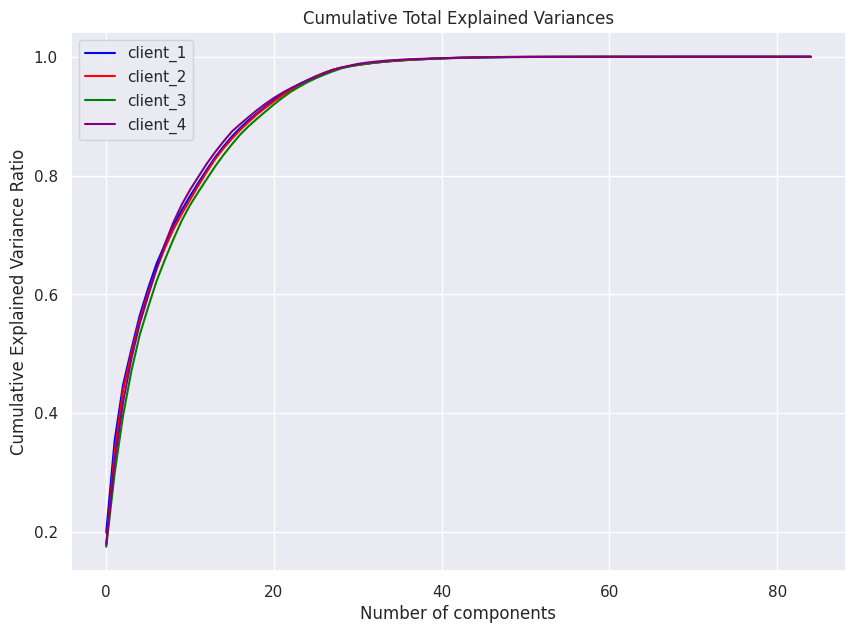

In [245]:
plt.figure(figsize=(10, 7))

plt.plot(np.cumsum(locals()['client_1']['pca'].explained_variance_ratio_), color='blue', label='client_1')
plt.plot(np.cumsum(locals()['client_2']['pca'].explained_variance_ratio_), color='red', label='client_2')
plt.plot(np.cumsum(locals()['client_3']['pca'].explained_variance_ratio_), color='green', label='client_3')
plt.plot(np.cumsum(locals()['client_4']['pca'].explained_variance_ratio_), color='purple', label='client_4')

plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title("Cumulative Total Explained Variances")
plt.legend()
plt.show()

## Scree Plot

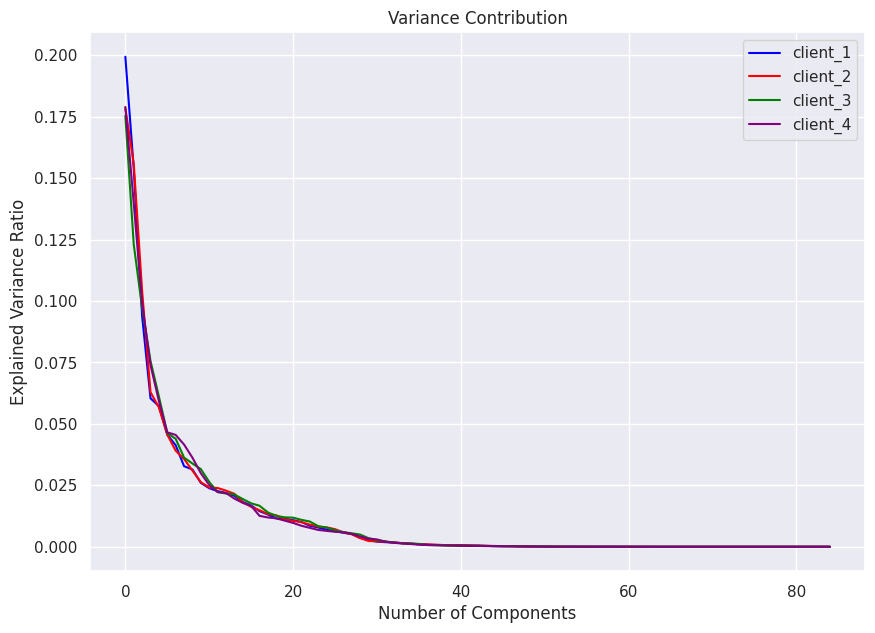

In [244]:

plt.figure(figsize=(10, 7))

# Scree Plot for 
plt.plot(locals()['client_1']['pca'].explained_variance_ratio_, color='blue', label='client_1')
plt.plot(locals()['client_2']['pca'].explained_variance_ratio_, color='red', label='client_2')
plt.plot(locals()['client_3']['pca'].explained_variance_ratio_, color='green', label='client_3')
plt.plot(locals()['client_4']['pca'].explained_variance_ratio_, color='purple', label='client_4')


# Labeling the plot
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title("Variance Contribution")
plt.legend()
plt.grid(True)
plt.show()


## Calculation of Feature Rank
- Each PCA is a Linear Combination of all the weights
- Loading Score: Stored by pca.components_ (n_pca x n_feature)
- Magnitue of Loading Score represents how much contribution each feature is having on a PCA
- Expalined Variance: PCA.explained_variance_holds how much variation a PCA holds. This is a squred value to make it positive always
- From Explained Variance and Loading Score we can calcuate how much a feature is contribing in variance and do the feature ranking accordingly

In [155]:
pca.explained_variance_ #Actual Variances unit is feature unit**2

array([1.50340217e+01, 1.17464545e+01, 8.33080349e+00, 6.21160908e+00,
       4.97967404e+00, 3.91047627e+00, 3.82262443e+00, 3.49389080e+00,
       3.04408774e+00, 2.51376950e+00, 2.10842175e+00, 1.87154172e+00,
       1.83949387e+00, 1.64541961e+00, 1.49977103e+00, 1.39572670e+00,
       1.05546083e+00, 1.00130110e+00, 9.70519196e-01, 8.93605552e-01,
       8.14709215e-01, 7.15929362e-01, 6.45622350e-01, 5.74304011e-01,
       5.42495120e-01, 5.11276633e-01, 4.97448661e-01, 4.37990078e-01,
       3.49408606e-01, 2.79999177e-01, 2.49732494e-01, 1.73586195e-01,
       1.34364167e-01, 1.12879997e-01, 9.46187471e-02, 7.22495710e-02,
       6.07484137e-02, 5.06381704e-02, 4.27639222e-02, 3.99042741e-02,
       3.38640451e-02, 2.82030279e-02, 2.65256267e-02, 2.33403560e-02,
       2.02254741e-02, 1.65831048e-02, 1.33802423e-02, 1.07398062e-02,
       9.88277852e-03, 7.90604386e-03, 5.82555820e-03, 5.22269794e-03,
       4.27253438e-03, 4.05351020e-03, 3.51189723e-03, 3.14374624e-03,
      

In [156]:
## It is ratio of pca.explained_variance_/sum(pca.explained_variance_) so it represents a ratio/percentage of total variances
pca.explained_variance_ratio_

array([1.78976023e-01, 1.39838411e-01, 9.91759959e-02, 7.39475511e-02,
       5.92816926e-02, 4.65531781e-02, 4.55073253e-02, 4.15938391e-02,
       3.62390535e-02, 2.99257561e-02, 2.51001991e-02, 2.22802055e-02,
       2.18986844e-02, 1.95882820e-02, 1.78543745e-02, 1.66157544e-02,
       1.25649800e-02, 1.19202228e-02, 1.15537724e-02, 1.06381360e-02,
       9.69889613e-03, 8.52294830e-03, 7.68596206e-03, 6.83693624e-03,
       6.45825986e-03, 6.08661210e-03, 5.92199377e-03, 5.21415518e-03,
       4.15961635e-03, 3.33331560e-03, 2.97299880e-03, 2.06649740e-03,
       1.59956961e-03, 1.34380629e-03, 1.12641097e-03, 8.60111892e-04,
       7.23193679e-04, 6.02833926e-04, 5.09093100e-04, 4.75049752e-04,
       4.03142435e-04, 3.35749533e-04, 3.15780518e-04, 2.77860719e-04,
       2.40778880e-04, 1.97417444e-04, 1.59288219e-04, 1.27854531e-04,
       1.17651845e-04, 9.41193457e-05, 6.93517182e-05, 6.21748275e-05,
       5.08633835e-05, 4.82559589e-05, 4.18082008e-05, 3.74254614e-05,
      

In [184]:
for key, element in clients.items():
    loadings = locals()[key]['pca'].components_  # Shape: (n_pca, n_features) each pca is a linkear combination of features
    explained_variance = locals()[key]['pca'].explained_variance_  # Shape: (85,) # Actual variances for pca componenets
    #Optionally, take the square root of the explained variance
    sqrt_explained_variance = np.sqrt(explained_variance)  # Optional: sqrt of variance
    
    # Select the first 35 components
    selected_components = loadings[:35]
    selected_explained_variance = sqrt_explained_variance[:35]  # Use sqrt if desired

    # Calculate the weighted feature importances using the (sqrt) explained variance as weights
    weighted_importances_matrix = np.abs(selected_components) * selected_explained_variance[:, np.newaxis]

    feature_importances = weighted_importances_matrix.sum(axis=0)
    normalized_feature_importances = feature_importances / feature_importances.sum()
    
    feature_importance_df = pd.DataFrame({
        'Feature': locals()[key]['df'].columns,
        'Importance': feature_importances,
        'Normalized Importance': normalized_feature_importances
    })
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    #print(feature_importance_df.head(20))
    feature_importance_df.to_csv(f'weighted_feature_importances_{key}.csv', index=False)

## Biplots
- biplots a way to plot data against first two PCA

In [247]:
## draw biplot
def draw_biplot(client_info, features=[]):
    # Get the PCA results (scores) for the first two principal components
    pca_result = client_info['data_pca'][:, :2]
    
    feature_indices = []
    for feature in features:
        feature_indices.append(client_info['df'].columns.get_loc(feature) )
    
    # Extract the loadings for the selected features from the PCA model
    loadings = client_info['pca'].components_.T
    # Get the loadings (contributions) for the two selected features on the first two principal components
    #selected_loadings = loadings[:, :2]
    selected_loadings = loadings[feature_indices, :2]

    # Biplot for the two selected features
    plt.figure(figsize=(10, 7))
    # Plot the scores (data points)
    plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.9, label='Observations')
    # Plot the loadings (arrows) for the two selected features
    for i, (feature, loading) in enumerate(zip(features, selected_loadings)):
        plt.arrow(0, 0, loading[0], loading[1], color='red', alpha=0.5, head_width=0.05)
        plt.text(loading[0] * 1.15, loading[1] * 1.15, feature, color='green', ha='center', va='center')
    
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Biplot')
    plt.grid()
    plt.legend()
    plt.show()
    


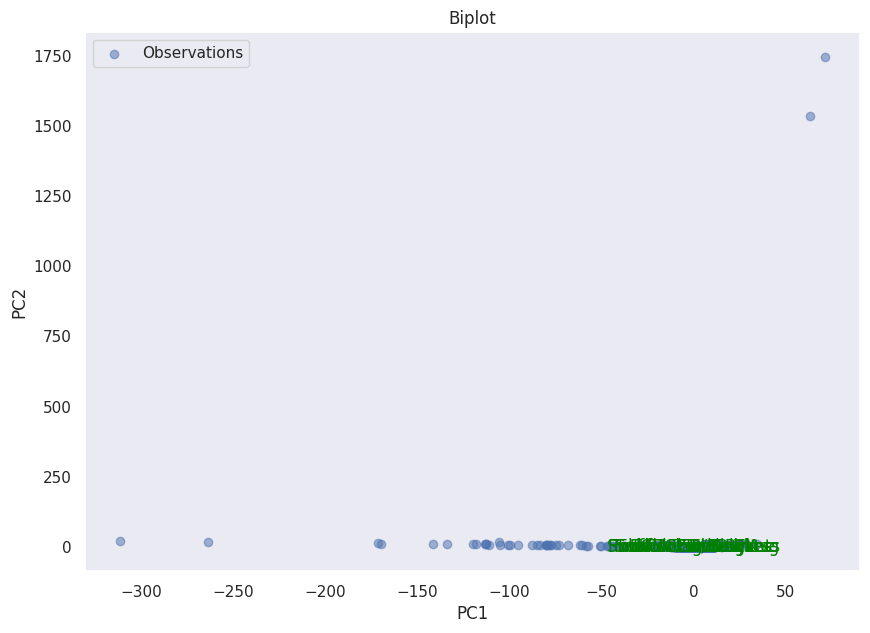

In [246]:
draw_biplot(locals()['client_1'], features=['Fwd Packet/Bulk Avg', 'Fwd PSH Flags', 'ECE Flag Count', 'Fwd Act Data Pkts', 'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Total TCP Flow Time'])
#draw_biplot(locals()['client_4'], features=['Fwd PSH Flags'])

## Choosing PCA Components
- Checking Cumulative variances agains components.
- 35 seems a good number
- We will try with 30, 33, 35
- dataset preparation will be conducted in ../dataset_preparation_using_pca.ipynb

In [269]:
print("PCA, client 1, client 2, client 3, client 4")
for i in range(30, 40):
    variance_1 = np.cumsum(locals()['client_1']['pca'].explained_variance_ratio_)[i]
    variance_2 = np.cumsum(locals()['client_2']['pca'].explained_variance_ratio_)[i]
    variance_3 = np.cumsum(locals()['client_3']['pca'].explained_variance_ratio_)[i]
    variance_4 = np.cumsum(locals()['client_4']['pca'].explained_variance_ratio_)[i]
    print(f"{i}: { variance_1:.5f}, { variance_2:.5f}, { variance_3:.5f}, { variance_4:.5f}")

PCA, client 1, client 2, client 3, client 4
30: 0.98633, 0.98616, 0.98642, 0.98795
31: 0.98819, 0.98818, 0.98859, 0.99001
32: 0.98993, 0.98993, 0.99030, 0.99161
33: 0.99139, 0.99140, 0.99169, 0.99296
34: 0.99266, 0.99265, 0.99304, 0.99408
35: 0.99367, 0.99368, 0.99419, 0.99494
36: 0.99456, 0.99462, 0.99489, 0.99566
37: 0.99529, 0.99543, 0.99555, 0.99627
38: 0.99599, 0.99610, 0.99617, 0.99678
39: 0.99664, 0.99670, 0.99667, 0.99725
